# New York City 311 Data

## Overview

In the city of New York, citizens with non-emergency complaints (e.g. trash non-collection, rodent infestations) can call 311 to make a Service Request.  These are recorded and shared on New York's open data site at  https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9.

## High-Level Description

The data dates from 2010 to the current day, with data being updated on a daily basis.  At the time of this writing, there are over 20 million rows, each row representing a single service request, and over 40 columns which represent aspects of each service request, such as the street address being referenced, the type of complaint, the agency responsible, the date of the service request, etc.

## Bring in Data Dictionary via pandas

We'll use `pandas` to bring in the (somewhat incomplete) data dictionary supplied by the City.

In [1]:
import pandas as pd
data_dict = pd.read_excel("https://nycopendata.socrata.com/api/views/erm2-nwe9/files/68b25fbb-9d30-486a-a571-7115f54911cd?download=true&filename=311_SR_Data_Dictionary_2018.xlsx",
                         sheet_name='Data Dictionary')




Let's take a peek at the data dictionary supplied by NYC.  You'll notice it's far from perfect!

In [2]:
data_dict

,Column Name,Description,Expected Values,Notes:
0,Unique Key,Unique identifier of a Service Request (SR) in...,NaN,This is NOT the Service Request (SR) # provide...
1,Created Date,Date SR was created,Date in format MM/DD/YY HH:MM:SS AM/PM,NaN
2,Closed Date,Date SR was closed by responding agency,Date in format MM/DD/YY HH:MM:SS AM/PM,NaN
3,Agency,Acronym of responding City Government Agency,NaN,NaN
4,Agency Name,Full Agency name of responding City Government...,NaN,NaN
5,Complaint Type,This is the fist level of a hierarchy identify...,NaN,NaN
6,Descriptor,"This is associated to the Complaint Type, and...",NaN,NaN
7,Status,Status of SR submitted,"Assigned, Cancelled, Closed, Pending, +",Prior column indicates most frequent
8,Due Date,Date when responding agency is expected to upd...,Date in format MM/DD/YY HH:MM:SS AM/PM,NaN
9,Resolution Action Updated Date,Date when responding agency last updated the SR.,Date in format MM/DD/YY HH:MM:SS AM/PM,NaN


And now, let's bring in the data itself!  I'm going to limit this to one million rows.

In [3]:
data311 = pd.read_csv("https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=1000000")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's take a quick peek at what the data looks like.  Then we'll use pandas to work with it!

In [4]:
data311.head(50)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,location_city,location,location_address,location_zip,location_state,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,21597740,2011-10-05T19:54:52.000,2011-10-11T00:00:00.000,DOB,Department of Buildings,Boilers,Boiler - Defective/Inoperative/No Permit,NaN,11375.0,72-36 112 STREET,...,NaN,POINT (-73.83814626627 40.720665940442),NaN,NaN,NaN,14786.0,40.0,3.0,28.0,70.0
1,21597741,2011-10-06T09:31:27.000,2011-10-07T00:00:00.000,DOB,Department of Buildings,General Construction/Plumbing,Site Conditions Endangering Workers,NaN,11420.0,110-02 110 STREET,...,NaN,POINT (-73.829321485185 40.678658190938),NaN,NaN,NaN,24016.0,62.0,3.0,46.0,64.0
2,21597742,2011-10-06T00:00:00.000,2011-10-24T00:00:00.000,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,11436.0,118-19 VAN WYCK EXPRESSWAY,...,NaN,POINT (-73.80197495694 40.676325228277),NaN,NaN,NaN,24671.0,41.0,3.0,46.0,71.0
3,21597743,2011-10-06T00:00:00.000,2011-10-13T00:00:00.000,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,CERAMIC-TILE,RESIDENTIAL BUILDING,10463.0,3246 KINGSBRIDGE AVENUE,...,NaN,POINT (-73.904293744928 40.88214360248),NaN,NaN,NaN,11272.0,48.0,5.0,40.0,33.0
4,21597744,2011-10-06T00:00:00.000,2011-10-12T00:00:00.000,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11224.0,1612 MERMAID AVENUE,...,NaN,POINT (-73.983959314464 40.576707695173),NaN,NaN,NaN,18184.0,21.0,2.0,45.0,35.0
5,21597745,2011-10-06T00:00:00.000,2011-10-19T00:00:00.000,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,10467.0,3425 KNOX PLACE,...,NaN,POINT (-73.883587100466 40.881863828802),NaN,NaN,NaN,11605.0,24.0,5.0,40.0,34.0
6,21597746,2011-10-06T06:29:00.000,2011-10-06T12:00:00.000,DSNY,"A - Illegal Posting Staten Island, Queens and ...",Dirty Conditions,E15 Illegal Postering,Sidewalk,11432.0,NaN,...,NaN,POINT (-73.796393700017 40.709532768166),NaN,NaN,NaN,24340.0,25.0,3.0,24.0,65.0
7,21597747,2011-10-06T13:24:00.000,2011-10-06T13:24:00.000,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,10475.0,NaN,...,NaN,POINT (-73.83047413353 40.869117536303),NaN,NaN,NaN,12344.0,43.0,5.0,2.0,28.0
8,21597748,2011-10-06T13:28:00.000,2011-10-04T23:25:00.000,DOT,Department of Transportation,Street Light Condition,Street Light Cycling,NaN,10472.0,NaN,...,NaN,POINT (-73.860571754279 40.830646835831),NaN,NaN,NaN,11610.0,58.0,5.0,31.0,26.0
9,21597751,2011-10-06T13:40:00.000,2011-10-07T00:55:00.000,DOT,Department of Transportation,Street Light Condition,Street Light Dayburning,NaN,10475.0,NaN,...,NaN,POINT (-73.827913988128 40.885990882104),NaN,NaN,NaN,11275.0,29.0,5.0,2.0,30.0


We're interested in looking at pothole repair time (from the opening of the ticket to the close) over time:

* Transform the string timestamp for `created_date` to a true datetime data type
* Do the same for `closed_date`
* Create a `time_to_close` variable and convert it to an integer
* Isolate just the pothole data
* Trim the columns so that the data is easier to work with / look at / understand
* Do some basic data visualization in matplotlib

In [5]:
data311['created_date'] = pd.to_datetime(data311['created_date'])
data311['closed_date'] = pd.to_datetime(data311['closed_date'])
data311['time_to_close'] = pd.to_timedelta(data311['closed_date'] - data311['created_date'], unit='d')
data311.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,location,location_address,location_zip,location_state,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,time_to_close
0,21597740,2011-10-05 19:54:52,2011-10-11,DOB,Department of Buildings,Boilers,Boiler - Defective/Inoperative/No Permit,NaN,11375.0,72-36 112 STREET,...,POINT (-73.83814626627 40.720665940442),NaN,NaN,NaN,14786.0,40.0,3.0,28.0,70.0,5 days 04:05:08
1,21597741,2011-10-06 09:31:27,2011-10-07,DOB,Department of Buildings,General Construction/Plumbing,Site Conditions Endangering Workers,NaN,11420.0,110-02 110 STREET,...,POINT (-73.829321485185 40.678658190938),NaN,NaN,NaN,24016.0,62.0,3.0,46.0,64.0,0 days 14:28:33
2,21597742,2011-10-06 00:00:00,2011-10-24,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,11436.0,118-19 VAN WYCK EXPRESSWAY,...,POINT (-73.80197495694 40.676325228277),NaN,NaN,NaN,24671.0,41.0,3.0,46.0,71.0,18 days 00:00:00
3,21597743,2011-10-06 00:00:00,2011-10-13,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,CERAMIC-TILE,RESIDENTIAL BUILDING,10463.0,3246 KINGSBRIDGE AVENUE,...,POINT (-73.904293744928 40.88214360248),NaN,NaN,NaN,11272.0,48.0,5.0,40.0,33.0,7 days 00:00:00
4,21597744,2011-10-06 00:00:00,2011-10-12,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11224.0,1612 MERMAID AVENUE,...,POINT (-73.983959314464 40.576707695173),NaN,NaN,NaN,18184.0,21.0,2.0,45.0,35.0,6 days 00:00:00


In [6]:
good_311_data = data311[~(data311['time_to_close']  < pd.to_timedelta(0))]
good_311_data.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,location,location_address,location_zip,location_state,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,time_to_close
0,21597740,2011-10-05 19:54:52,2011-10-11,DOB,Department of Buildings,Boilers,Boiler - Defective/Inoperative/No Permit,NaN,11375.0,72-36 112 STREET,...,POINT (-73.83814626627 40.720665940442),NaN,NaN,NaN,14786.0,40.0,3.0,28.0,70.0,5 days 04:05:08
1,21597741,2011-10-06 09:31:27,2011-10-07,DOB,Department of Buildings,General Construction/Plumbing,Site Conditions Endangering Workers,NaN,11420.0,110-02 110 STREET,...,POINT (-73.829321485185 40.678658190938),NaN,NaN,NaN,24016.0,62.0,3.0,46.0,64.0,0 days 14:28:33
2,21597742,2011-10-06 00:00:00,2011-10-24,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,11436.0,118-19 VAN WYCK EXPRESSWAY,...,POINT (-73.80197495694 40.676325228277),NaN,NaN,NaN,24671.0,41.0,3.0,46.0,71.0,18 days 00:00:00
3,21597743,2011-10-06 00:00:00,2011-10-13,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,CERAMIC-TILE,RESIDENTIAL BUILDING,10463.0,3246 KINGSBRIDGE AVENUE,...,POINT (-73.904293744928 40.88214360248),NaN,NaN,NaN,11272.0,48.0,5.0,40.0,33.0,7 days 00:00:00
4,21597744,2011-10-06 00:00:00,2011-10-12,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11224.0,1612 MERMAID AVENUE,...,POINT (-73.983959314464 40.576707695173),NaN,NaN,NaN,18184.0,21.0,2.0,45.0,35.0,6 days 00:00:00


Before we start filtering, we want to understand what kinds of street condition reports there are -- maybe potholes aren't the only thing we want to track!  We are going to make a **copy**, not just a **slice** of data -- a whole new data frame we call `street_conditions`.

In [7]:
street_conditions = good_311_data[good_311_data['complaint_type'] == "Street Condition"].copy()
street_conditions.head(50)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,location,location_address,location_zip,location_state,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,time_to_close
20,21597770,2011-10-06 15:47:46,2011-10-14 08:35:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11426.0,84-25 247 STREET,...,POINT (-73.71993014756 40.73422604306),NaN,NaN,NaN,24335.0,63.0,3.0,16.0,63.0,7 days 16:47:14
21,21597772,2011-10-05 22:46:51,2011-10-19 07:00:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,10309.0,NaN,...,POINT (-74.211953031525 40.54397076256),NaN,NaN,NaN,10696.0,15.0,1.0,9.0,77.0,13 days 08:13:09
36,21597794,2011-10-04 20:41:21,2011-10-06 00:00:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,10019.0,NaN,...,POINT (-73.976235314884 40.76567588067),NaN,NaN,NaN,NaN,19.0,4.0,19.0,13.0,1 days 03:18:39
37,21597795,2011-10-05 22:30:20,2011-10-10 02:20:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,10019.0,NaN,...,POINT (-73.982877463354 40.766714571467),NaN,NaN,NaN,12081.0,11.0,4.0,10.0,10.0,4 days 03:49:40
43,21597809,2011-10-06 13:16:07,2011-10-19 11:20:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11101.0,NaN,...,POINT (-73.928494994521 40.736869224487),NaN,NaN,NaN,16858.0,53.0,3.0,33.0,66.0,12 days 22:03:53
193,21597990,2011-10-06 05:54:50,2011-10-12 10:28:46,DOT,Department of Transportation,Street Condition,Failed Street Repair,Street,10304.0,NaN,...,POINT (-74.080869300143 40.627168165301),NaN,NaN,NaN,10691.0,4.0,1.0,13.0,74.0,6 days 04:33:56
195,21597999,2011-10-06 08:23:40,2011-10-07 14:17:32,DOT,Department of Transportation,Street Condition,Defective Hardware,Street,10003.0,336 EAST 6 STREET,...,POINT (-73.987577957634 40.726984933981),NaN,NaN,NaN,11724.0,70.0,4.0,50.0,5.0,1 days 05:53:52
242,21598092,2011-10-05 22:47:40,2011-10-11 08:35:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11238.0,NaN,...,POINT (-73.967190625484 40.673694036651),NaN,NaN,NaN,13829.0,16.0,2.0,48.0,49.0,5 days 09:47:20
243,21598093,2011-10-06 14:01:45,2011-10-07 11:56:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11220.0,275 46 STREET,...,POINT (-74.013099715791 40.650444200522),NaN,NaN,NaN,18180.0,9.0,2.0,7.0,45.0,0 days 21:54:15
257,21598118,2011-10-06 11:00:08,2011-10-19 07:46:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11374.0,90-18 63 DRIVE,...,POINT (-73.865167624946 40.725709945188),NaN,NaN,NaN,14785.0,40.0,3.0,28.0,70.0,12 days 20:45:52


Let's look at unique values for `descriptor`:

In [8]:
street_conditions['descriptor'].unique()

array(['Pothole', 'Failed Street Repair', 'Defective Hardware', 'Cave-in',
       'Rough, Pitted or Cracked Roads', 'Blocked - Construction',
       'Plate Condition - Shifted', 'Plate Condition - Noisy',
       'Wear & Tear', 'Line/Marking - Faded', 'Unsafe Worksite',
       'Plate Condition - Open', 'Line/Marking - After Repaving',
       'Depression Maintenance', 'Hummock', 'Guard Rail - Street',
       'Crash Cushion Defect', 'General Bad Condition',
       'Maintenance Cover', 'Strip Paving'], dtype=object)

Lots to choose from!  What about counts of each type?  This might help us decide on whether there are enough potholes alone to merit study, or if we should include all street conditions complaints.


In [9]:
street_conditions['descriptor'].value_counts()

Pothole                           22440
Failed Street Repair               4207
Cave-in                            3423
Defective Hardware                 3024
Rough, Pitted or Cracked Roads     2502
Plate Condition - Noisy            1609
Wear & Tear                        1101
Blocked - Construction              943
Line/Marking - Faded                639
Plate Condition - Shifted           445
Unsafe Worksite                     377
Plate Condition - Open              207
Line/Marking - After Repaving       159
Hummock                              78
Guard Rail - Street                  60
Crash Cushion Defect                 26
Depression Maintenance               21
General Bad Condition                 4
Maintenance Cover                     3
Strip Paving                          3
Name: descriptor, dtype: int64

With ~22k pothole complaints among 1M rows, there are plenty of potholes for us to do data analysis on. Let's use the Socrata API to bring in the pothole data (up to 2 million rows, but we won't get that many) from the many millions of rows of NYC 311 data!  We'll also free up some memory by removing the data frames we won't use again, and running garbage collection (gc):

In [10]:
import gc
del [[data311, street_conditions]]
gc.collect()

170

In [11]:
potholes = pd.read_csv("https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?descriptor=Pothole&$limit=2000000")
potholes['created_date'] = pd.to_datetime(potholes['created_date'])
potholes['closed_date'] = pd.to_datetime(potholes['closed_date'])
potholes['time_to_close'] = pd.to_timedelta(potholes['closed_date'] - potholes['created_date'], unit='d')

How many pothole complaints do we have?

In [12]:
potholes.count()

unique_key                        563896
created_date                      563896
closed_date                       561015
agency                            563896
agency_name                       563896
complaint_type                    563896
descriptor                        563896
location_type                       1875
incident_zip                      520008
incident_address                  353307
street_name                       353307
cross_street_1                    458860
cross_street_2                    458795
intersection_street_1             201438
intersection_street_2             201437
address_type                      546320
city                              523427
landmark                               0
facility_type                          0
status                            563896
due_date                            1872
resolution_description            563360
resolution_action_updated_date    563704
community_board                   563896
bbl             

I'm very interested in the number of days it takes for potholes to be fixed, so I'll create a new variable that says (in a numberic data type, not a timedelta) how many days are in the timedelta `time_to_close`.

In [13]:
from datetime import datetime, timedelta
potholes['days_to_close'] = potholes['time_to_close'] / timedelta (days=1)

In [14]:
potholes.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,bridge_highway_segment,latitude,longitude,location_city,location,location_address,location_zip,location_state,time_to_close,days_to_close
0,42088661,2019-03-27 06:00:00,2019-03-28 12:45:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11232.0,4 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 days 06:45:00,1.281250
1,42082262,2019-03-29 12:53:16,2019-04-05 00:41:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11219.0,45 STREET,...,NaN,40.635271,-73.986485,NaN,POINT (-73.986485320072 40.635270980397),NaN,NaN,NaN,6 days 11:47:44,6.491481
2,42082313,2019-03-29 16:21:58,2019-04-01 09:54:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11364.0,217-17 50 AVENUE,...,NaN,40.754760,-73.762915,NaN,POINT (-73.762915171132 40.754760045194),NaN,NaN,NaN,2 days 17:32:02,2.730579
3,42082318,2019-03-29 16:53:53,2019-04-12 10:12:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,10468.0,NaN,...,NaN,40.873660,-73.898372,NaN,POINT (-73.898372307592 40.873660185745),NaN,NaN,NaN,13 days 17:18:07,13.720914
4,42082213,2019-03-27 14:18:37,2019-03-28 19:40:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11237.0,434 MELROSE STREET,...,NaN,40.705289,-73.926459,NaN,POINT (-73.926458599999 40.70528948225),NaN,NaN,NaN,1 days 05:21:23,1.223183


## Visualization With Matplotlib

Let's try to get some understanding of pothole repair times using matplotlib.  We'll begin by just plotting the number of days it took to fix potholes as a function of the initial complaint date.  We're going to use `matplotlib` as a tool of exploratory data analysis (EDA), not as the engine of perfectly beautiful data visualizations.

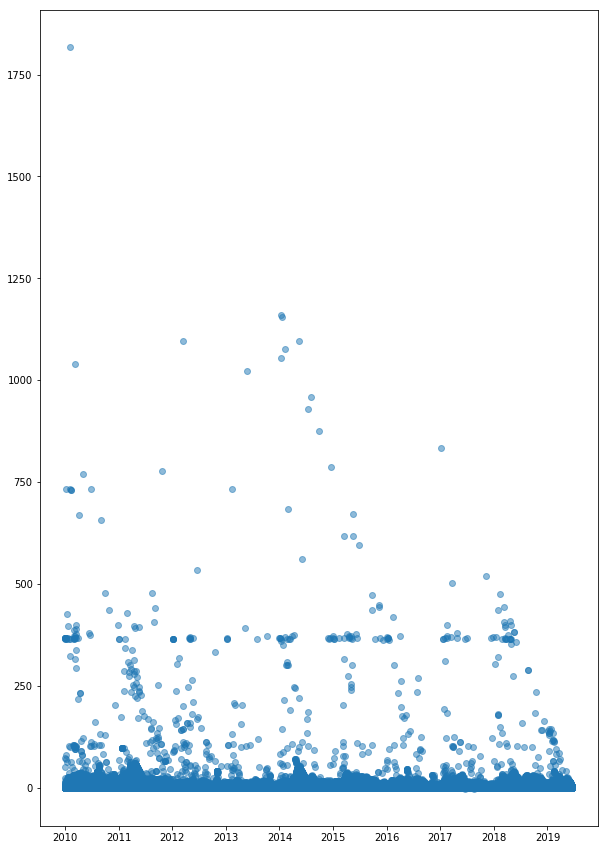

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,15))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#plt.xlim(datetime(2014,6,1), datetime(2019,8,1))
ax.plot(potholes['created_date'], 
        potholes['days_to_close'], 
        marker='o', 
        linestyle='',  
        alpha = 0.5)

plt.show()

The existence of some outliers makes the overall trend (maybe a decline, over time, of the time it took to fix potholes?) hard to see.  If we had bins, say, by month or year, we could do box plots to help us understand statistical trends, but we're not advanced enough yet to do that kind of feature engineering!  But we do have some bins already -- the borough bins!  Let's do a boxplot using `pandas` -- it's far easier to plot categorical data in `pandas` than in `matplotlib`.

## Visualization With Pandas


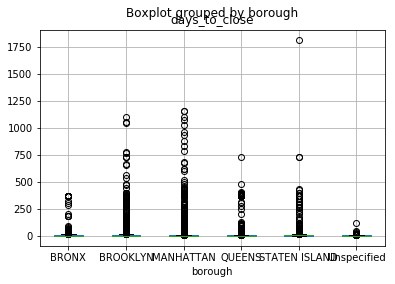

In [16]:
potholes.boxplot("days_to_close", by='borough')

It's hard to know if there is a statistical difference between boroughs, because, again, the outliers make it hard to compare the actual box, which is down around 0.  Let's change some parameters!

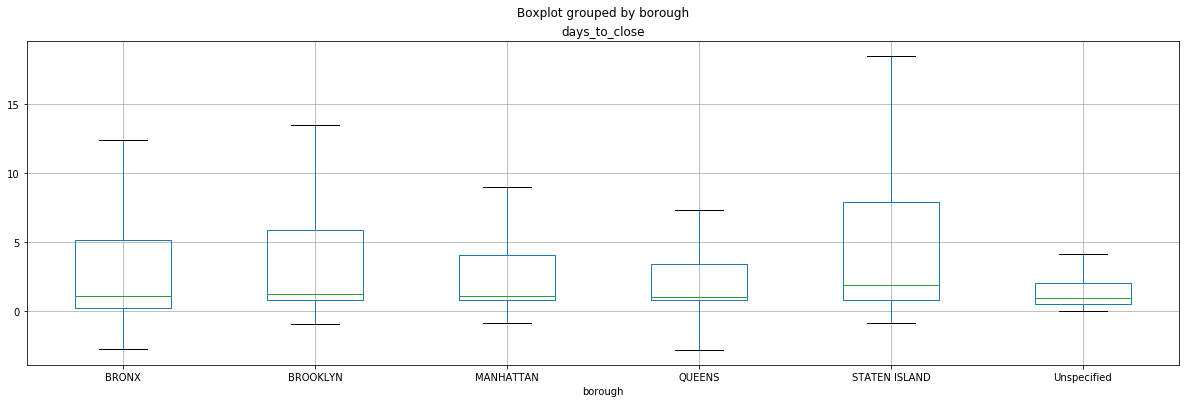

In [17]:
potholes.boxplot("days_to_close", by='borough', showfliers=False, figsize = (20,6))

What's interesting here is that the IQR (interquartile range, or middle 50%) for Manhattan and Queens is much smaller than other boroughs, for example, Staten Island.  Maybe Manhattanites are very demanding, so there's rapid response all the time.  This gives me some ideas about research questions, such as:

* Are Manhattan complaints in general dealt with more quickly than complaints from other boroughs?
* Are Queens complaints in general dealt with more quickly than complaints from other boroughs?
* Are potholes different than other kinds of complaints?  E.g. is the rapid response for Queens potholes not due to overall pro-Queens bias but perhaps due to some other reason?
* How have different boroughs been treated over time?  It seems like the response time for potholes might have improved over time -- is that true for all boroughs?

Let's see what else we can learn through graphical EDA using Seaborn!

## Visualization With Seaborn

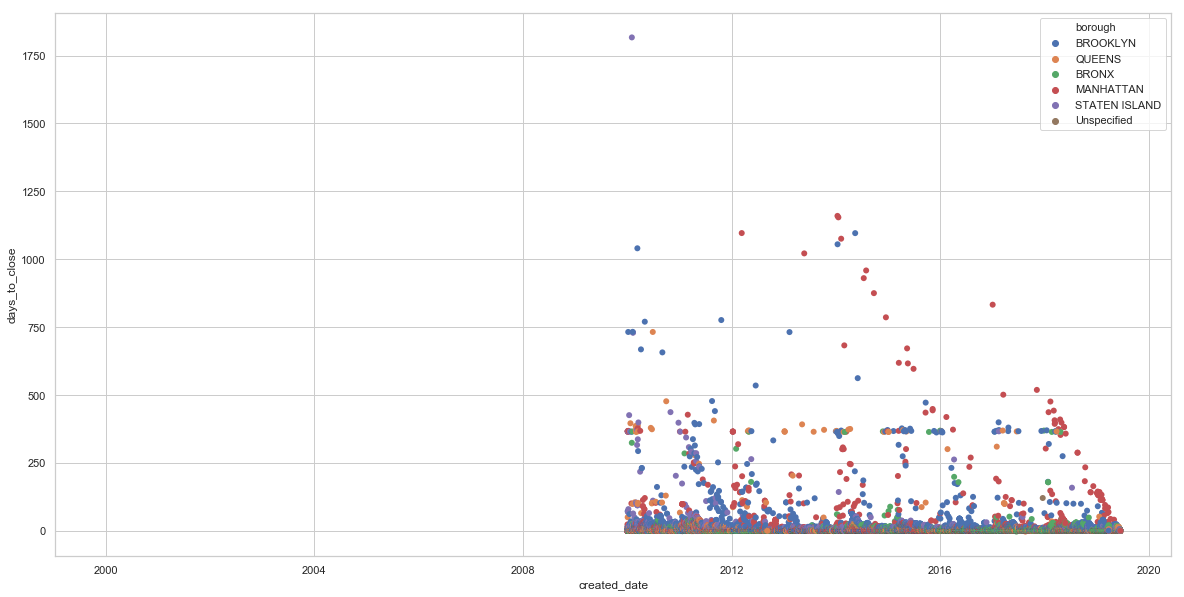

In [18]:
import seaborn as sns
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="created_date", y="days_to_close",
                hue="borough", linewidth=0,
                data=potholes, ax=ax)

This is weird!  Why does my plot start at 2000, when my data does not? 

* https://stackoverflow.com/questions/54050472/seaborn-scatterplot-datetime-xaxis-too-wide
* https://github.com/mwaskom/seaborn/issues/1641#issuecomment-452078518
 
Long story short, this is a `matplotlib` problem, and there's not a simple workaround.  We can manually set the x axis, however, setting the start and end date we want to see:

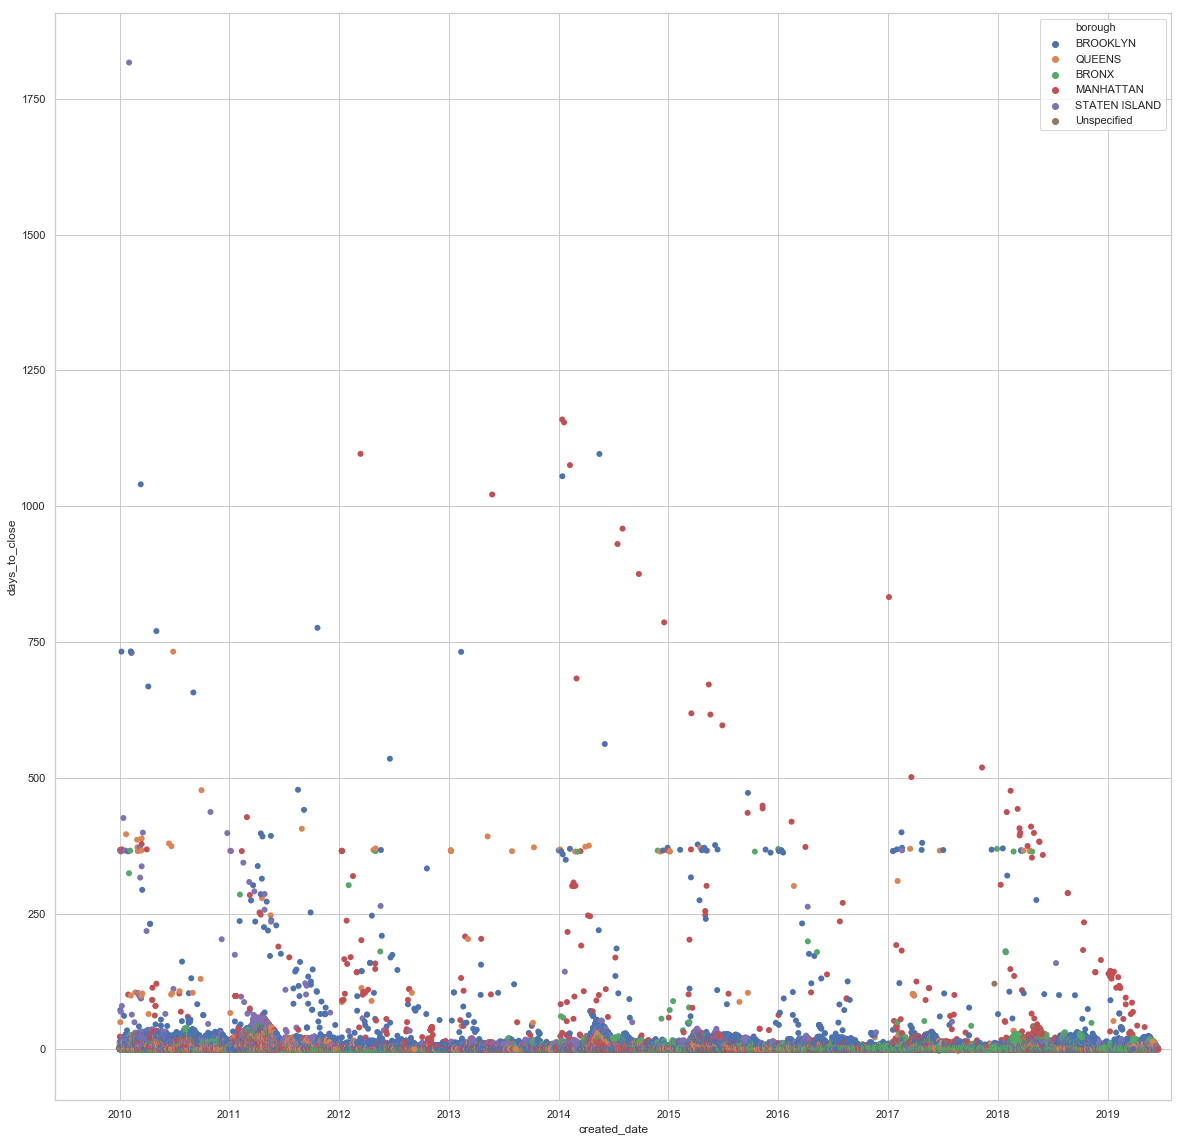

In [19]:
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(20, 20))
plt.xlim(datetime(2009,6,1), datetime(2019,8,1))
sns.scatterplot(x="created_date", y="days_to_close",
                hue="borough", linewidth=0,
                data=potholes, ax=ax)

Again, those darn outliers prevent us from seeing overall trends.  Let's remove outliers (maybe `days_to_close` greater than 30):

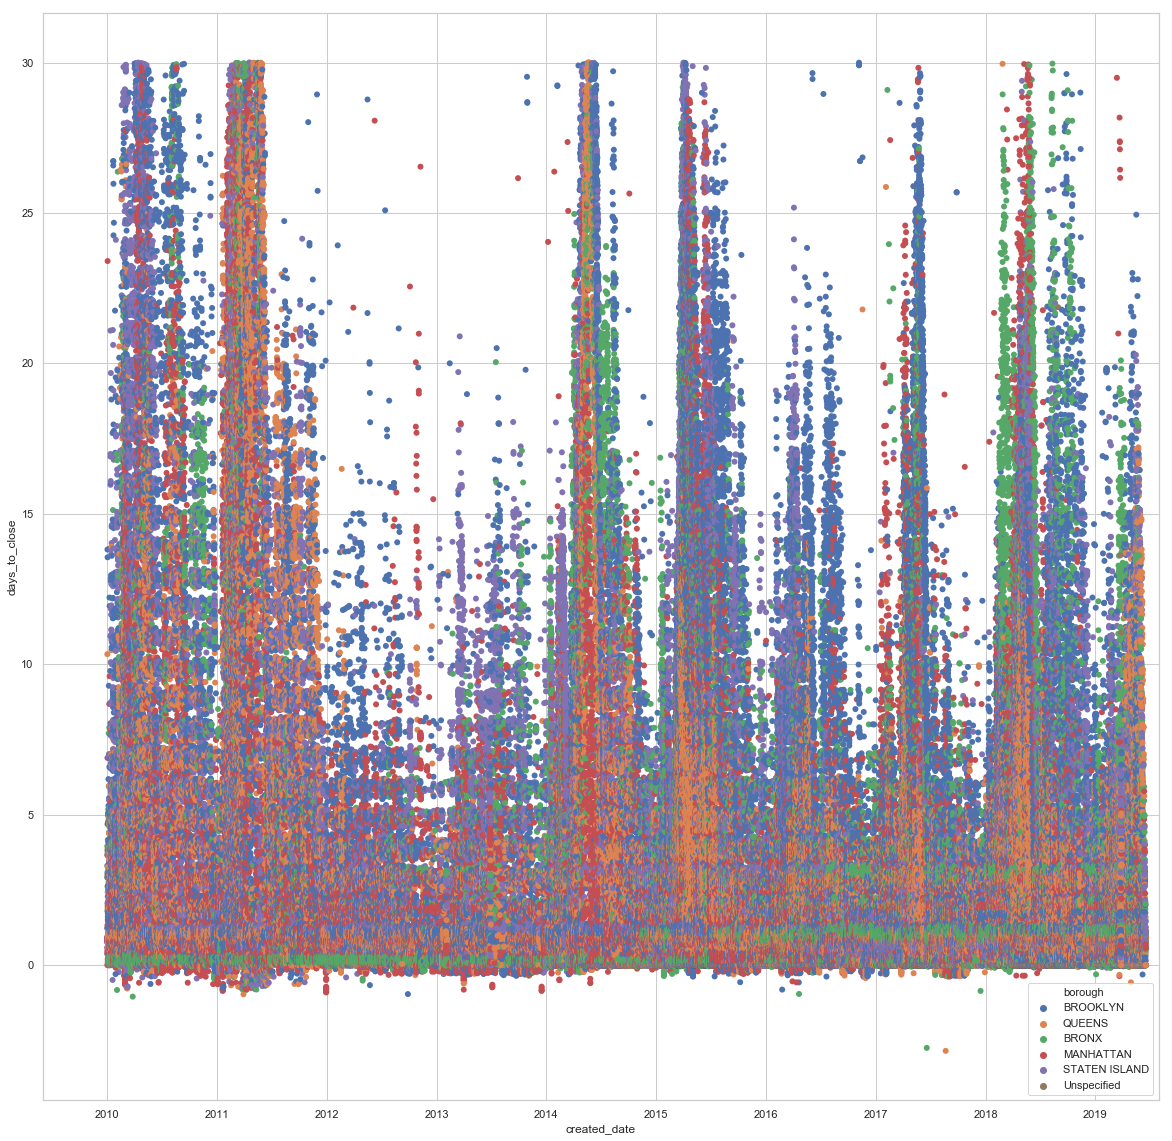

In [20]:
f, ax = plt.subplots(figsize=(20, 20))
plt.xlim(datetime(2009,6,1), datetime(2019,8,1))
sns.scatterplot(x="created_date", y="days_to_close",
                hue="borough", linewidth=0,
                data=potholes[potholes['days_to_close'] <= 30], ax=ax)

Wow, this is interesting!  There are some line artifacts -- diagonal in some views or so steep they look vertical, as in the above graph -- what the heck is that?  I suspect this has to do with batches of complaints being formally closed for a given borough when work crews concentrate in a specific area.  So, in a couple of days, a lot of open tickets get closed out all at once in one borough (giving us a stripe of that borough's color), and then the complaints build up there for awhile before all getting resolved later in another few day work sprint.  Meanwhile, complaints come in fairly evenly, across all days. 

How could we test this theory?

Also, we have some negative time-to-close.  We should probably remove them as we advance in our data analysis.

What have we learned?

* There are differences in pothole resolution time between boroughs
* There are spikes in pothole resolution time (due to weather? Crew locations?)
* There are more things we'd like to do once we can bin time into months or years